In [ ]:
#подключение гугл диска
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#ПОТОКОВЫЙ ВВОД И ВВЫВОД

**ПОТОКОВЫЙ ВВОД** \
Функция input() хорошо подходит для ввода данных, когда мы знаем, сколько строк с данными предстоит ввести, либо знаем, какая строка будет сигналом для остановки ввода данных. Если количество входных строк мы не знаем, а строки для остановки ввода не предусмотрено, следует использовать так называемый стандартный поток ввода.

**Поток ввода (sys.stdin)** — это специальный объект в программе, куда попадает весь текст, который ввёл пользователь. Потоком его называют потому, что данные хранятся в нем до тех пор, пока программа их не прочитала.

Поток ввода (sys.stdin)  является итератором, который невозможно перезапустить. Как и любой итератор, он может двигаться только вперёд. Как только данные прочитаны, они удаляются из потока ввода безвозвратно. Элементы, которые выдает этот итератор — это строки, введённые пользователем. Если пользовательский ввод закончен, то итератор прекращает работу.

Чтобы работать с потоком ввода (sys.stdin), необходимо подключить модуль sys стандартной командой

**import sys**


**sys.stdin.read()**- возвращает строку, хранящую  в себе весь пользовательский ввод ( с сохранением \n и тд)

**sys.stdin.readlines()** - вовращает список строк, введенных пользователем  ( с сохранением \n и тд)

In [ ]:
#Пример 1: программа, которая дублирует каждую введённую пользователем строку
#Пока есть данные в потоке ввода sys.stdin(то есть пока пользователь их вводит) программа будет записывать вводимые строки в переменную line, убирать символы перевода строки и выводить их на печать.
#Для завершения ввода необходимо ввести Ctrl + D
import sys

for line in sys.stdin:
    print(line.strip('\n'))


In [ ]:
#Пример 2: считывание всего пользовательского ввода в список
import sys
data = [line.strip() for line in sys.stdin]

**ПОТОКОВЫЙ ВЫВОД**

По умолчанию функция print() перенаправляет вывод данных  в **sys.stdout**, можно направлять данные в sys.stdout самостоятельно

In [ ]:
import sys
sys.stdout.write('Hello ')
sys.stdout.write('word! ')
sys.stdout.write('from python\n')
print('Bye-bye')
sys.stdout.write(str(17))

#Метод write не переводит на новую строку как print, нужно добавлять \n самостоятельно.
#Также  нам нужно самостоятельно преобразовывать данные к строковому типу данных (функция print() это делает автоматически).

Hello word! from python
Bye-bye
17

# ФАЙЛОВЫЙ ВВОД И ВЫВОД

Этапы работы с файлом:

1.   Открытие файла
2.   Чтение/запись данных
3.   Закрытие файла







**ОТКРЫТИЕ ФАЙЛА И ЗАКРЫТИЕ ФАЙЛА** \

Для открытия файлов в Python существует функция **open()**. Она создает файловый объект и связывает его с файлом на диске. Общий формат применения функции open():

**файловая_переменная = open(имя_файла, режим_доступа)**

* *файловая переменная* – дескриптор файла, т.е имя переменной, которая ссылается на файловый объект;
* *имя_файла* – строковый литерал, задающий имя файла + путь к файлу;
* *режим_доступа* – строковый литерал, задающий режим доступа (чтение, запись, и т.д.), в котором файл будет открыт.


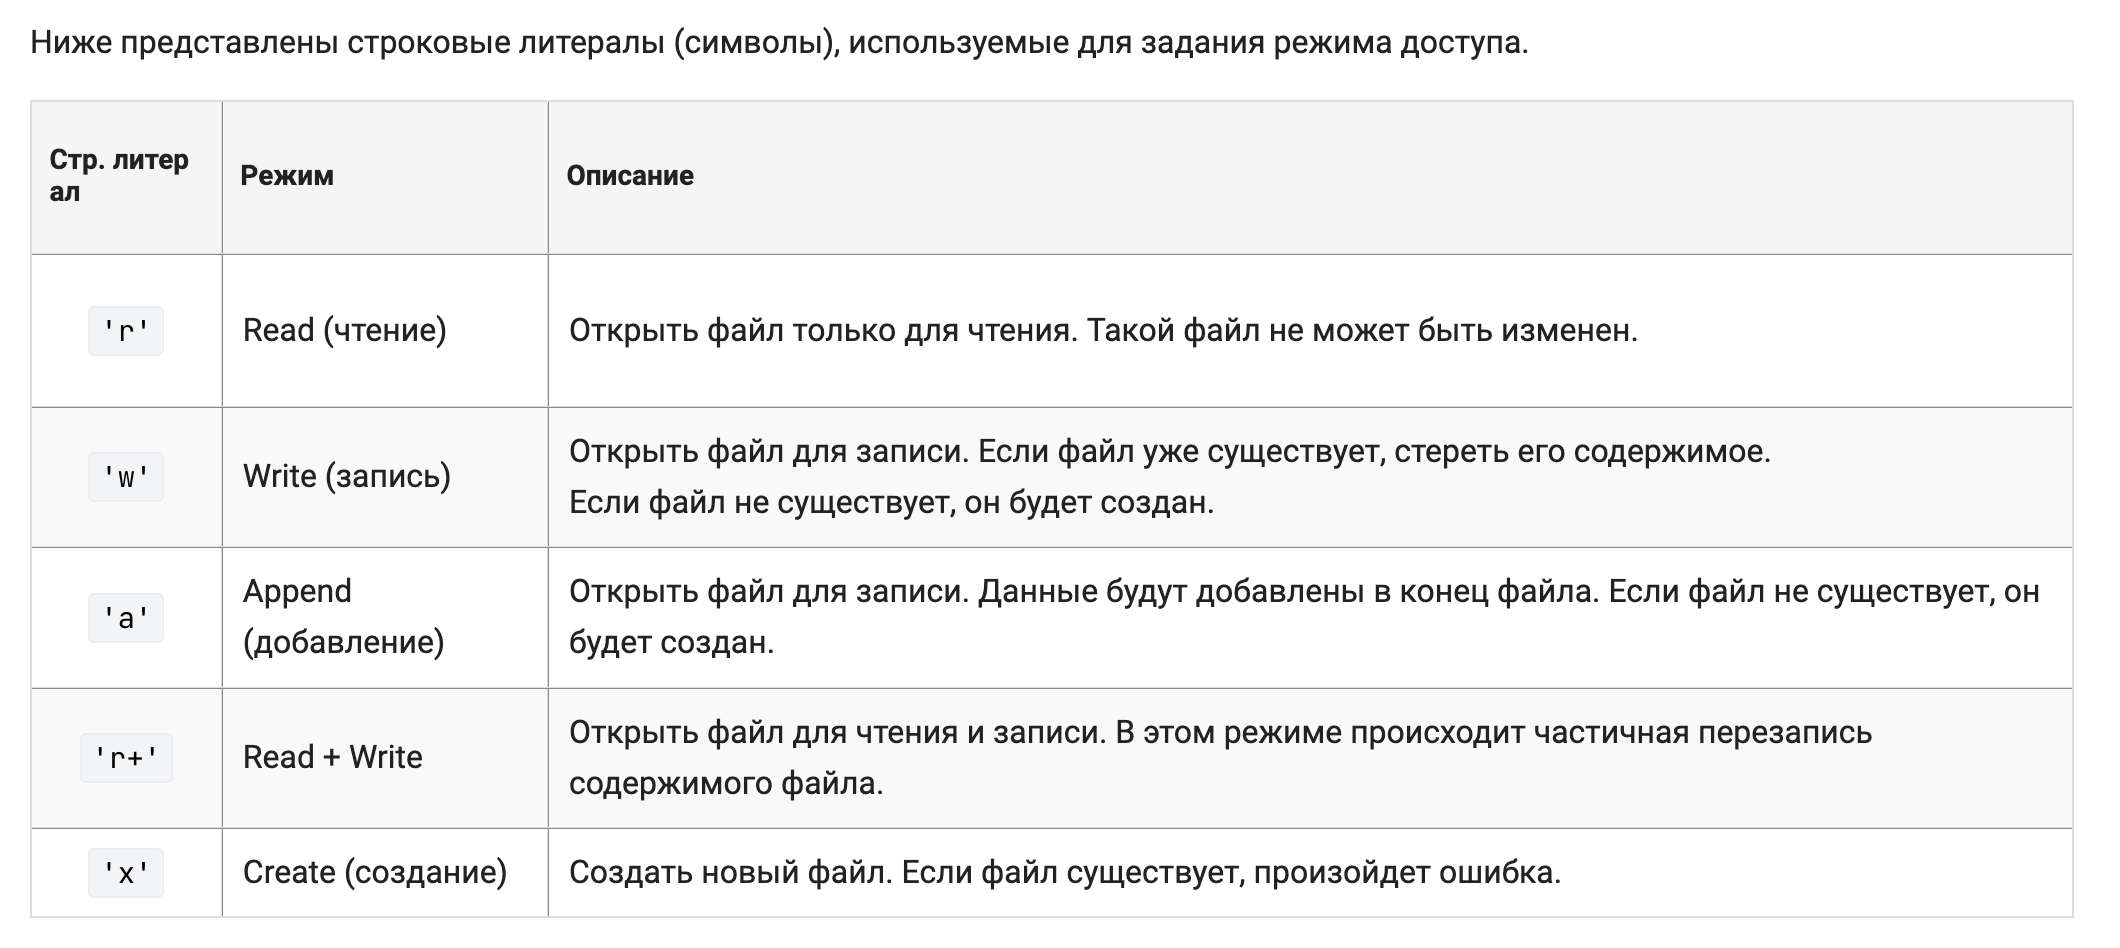

После окончания работы с файлом его необходимо закрыть.

**файловая_переменная.close()**

In [ ]:
student_file = open('students.txt', 'w')
my_file = open('text.txt')   # по умолчанию режим доступа для чтения ('rt’)-чтение текстового файла

student_file.close()
my_file.close()

In [4]:
inp = open('input_file.txt')
out = open('output_file.txt', 'w')
content = inp.read()
out.write(content)
inp.close()
out.close()

In [ ]:
#При работе с текстом на русском языке нужно указать кодировку, для этого служит параметр encoding:
file = open('info.txt', 'r', encoding='utf-8')
file.close()

Если название файла передается без указания пути, интерпретатор Python исходит из предположения, что место расположения файла то же, что у исполняемой программы. Если файл лежит в другом месте, нужно указать полный путь до него

In [ ]:
f = open('/Users/katechikareva/Desktop/text.txt', 'w')
f.close()

**МЕНЕДЖЕР КОНКЕКСТА** \


Закрытие файлов вручную методом close(), а также отдача закрытия на откуп среде исполнения, обладают существенным недостатком: если между открытием файла и его закрытием произойдёт ошибка, в лучшем случае файл окажется открыт слишком долго, а в худшем случае часть данных не сохранится.

Поэтому предпочтительный вариант использовать менеджер контекста:

In [ ]:
with open('languages.txt', 'r') as file:
    for line in file:
        print(line)
                          # автоматическое закрытие файла
print('Файл закрыт')

In [ ]:
#С помощью менеджера контекста можно работать с несколькими файлами.
with open('input.txt', 'r') as input_file, open('output.txt', 'w') as output_file:
    # обработка файлов

**ЧТЕНИЕ СОДЕРЖИМОГО ФАЙЛА**

Для чтения содержимого открытого для чтения файла используются три файловых метода:
* **read(n)** – читает все содержимое файла;  считывает все содержимое файла, включая переносы строк; n - необязательный параметр, количество символов, которые будут считаны
* **readline()** – метод считывает одну строку из файла (до символа конца строки), при этом возвращается считанная строка вместе с символом '\n'. Если считать строку не удалось – достигнут конец файла и больше строк в нем нет, возвращается пустая строка.
* **readlines()** – читает все содержимое файла и возвращает список строк, при этом, каждая строка в списке заканчивается символом переноса строки  '\n'




Способы прочтения содержимого по одной строке:

In [ ]:
#READ
with open('/content/gdrive/MyDrive/Colab Notebooks/pushkin.txt') as file:
  print(file.read())

In [ ]:
#READLINE, 1 способ: цикл while
with open('/content/gdrive/MyDrive/Colab Notebooks/pushkin.txt') as file:
    line = file.readline()         # считываем первую строку
    while line != '':              # пока не конец файла
        print(line.strip())        # обрабатываем считанную строку
        line = file.readline()     # читаем новую строку


In [ ]:
#READLINE, 2 способ: цикл for, предпочтительнее
with open('/content/gdrive/MyDrive/Colab Notebooks/pushkin.txt') as file:
  for line in file:
    print(line.strip())

In [ ]:
#READLINES формируется список строк
with open('/content/gdrive/MyDrive/Colab Notebooks/pushkin.txt') as file:
    lines = [line.strip() for line in file.readlines()]
    print(*lines, sep = '\n')

Я вас любил: любовь еще, быть может,
В душе моей угасла не совсем;
Но пусть она вас больше не тревожит;
Я не хочу печалить вас ничем.
Я вас любил безмолвно, безнадежно,
То робостью, то ревностью томим;
Я вас любил так искренно, так нежно,
Как дай вам Бог любимой быть другим.



**ЗАПИСЬ В ФАЙЛ** \

Для записи используются два файловых метода:

*  **file.write(string)** - метод записывает в файловую переменную file строку string

*  **file.writelines(rows)** - метод записывает в файловую переменную file список строк rows

Оба метода write() и writelines() не добавляют переход на новую строку, поэтому для перехода на новую строку в файле необходимо явно добавить символ '\n'.

In [ ]:
with open('myfile.txt', 'w', encoding='utf-8') as file:
    file.write('Hello world!\n')
    file.write('Using python\n')


In [ ]:
philosophers = ['Джoн Локк\n', 'Дэвид Хьюм\n', 'Эдмyнд Берк\n']
with open('philosophers.txt', 'w', encoding='utf-8') as file:
    file.writelines(philosophers)

Для форматирования выводимого текста можно использовать функцию **print()**

In [ ]:
with open('philosophers.txt', 'w', encoding='utf-8') as output:
    print('Джoн Локк', file=output)
    print('Дэвид Хьюм', file=output)
    print('Эдмyнд Берк', file=output)
    print('Джoн Локк', 'Дэвид Хьюм', 'Эдмyнд Берк', sep='***', file=output)

# РАБОТА С CSV ФАЙЛАМИ

**CSV** (от англ. Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми.

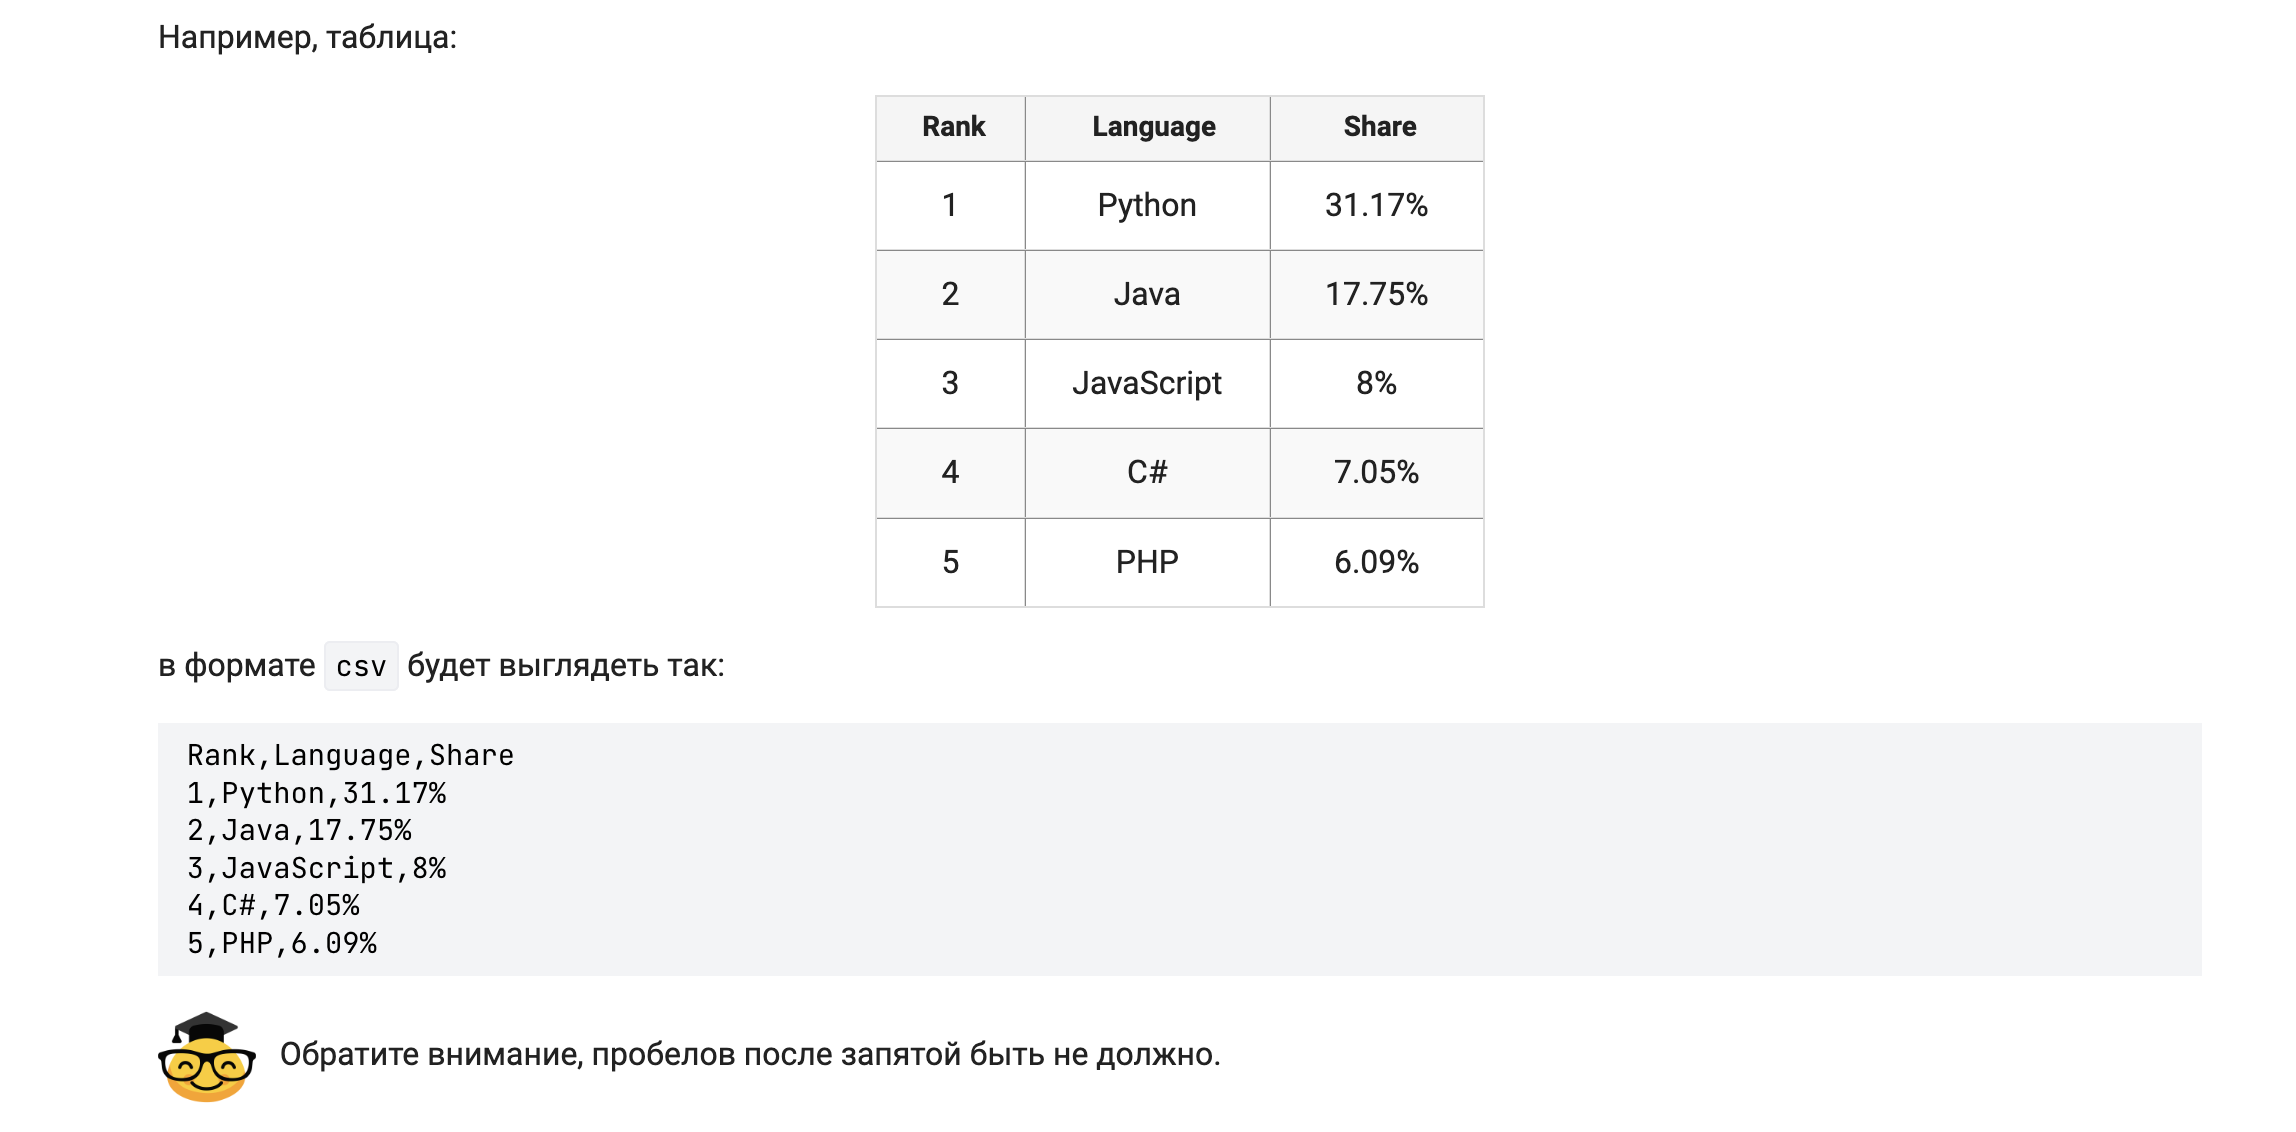

**РАБОТА С CSV ФАЙЛОМ С ПОМОЩЬЮ СТАНДАРТНОГО ФАЙЛОВОГО ВВОДА/ВЫВОДА:**

In [ ]:
#чтение файла
with open('/content/gdrive/MyDrive/Colab Notebooks/languages.csv') as file:
  rows = [row.strip() for row in file.readlines()] #список строк из файла
  table = [row.split(',') for row in rows] #двумерный массив, где каждый элемент = ячейка таблицы
  print(*table, sep = '\n')

In [ ]:
#запись в файл
text = '''Rank,Language,Share
1,Python,31.17%
2,Java,17.75%
3,JavaScript,8%
4,C#,7.05%
5,PHP,6.09%'''

with open('languages.csv', 'w', encoding='utf-8') as file:
    file.write(text)

**МОДУЛЬ CSV**

Python имеет встроенный модуль **csv** для работы с файлами данного формата.

Он включает в себя:
*   функция csv.reader
*   функция csv.writer
*   класс csv.DictReader
*   класс csv.DictWriter

**csv.reader(file, delimiter, quotechar)** - функция, возвращающая объект чтения =  итератор, с помощью которого можно «пробежаться» циклом по файлу. В каждой итерации цикла будет доступен список элементов строки файла, разбитой по разделителю delimiter

Параметры:
*  **file** - файловая переменная
*  **delimiter** —необязательный параметр,  односимвольная строка, используемая для разделения полей, по умолчанию имеет значение ','
*  **quotechar** — необязательный параметр, односимвольная строка, используемая для кавычек в полях, содержащих специальные символы, по умолчанию имеет значение ' " '.


In [ ]:
import csv
with open('/content/gdrive/MyDrive/Colab Notebooks/languages.csv') as file:
  rows = csv.reader(file)  #итератор по строкам
  titles = next(rows)  #выделение заголовков
  for row in rows:
    print(row) #вывод строк файла на экран, каждая строка = список

**csv.DictReader(file, delimiter, quotechar)** - объект позволяет считать каждую строку   css файла  в словарь, ключами таких словарей будут являться названия столбов из первой строки файла; объект возвращает итератор по словарям.

С помощью DictReader объекта мы можем обращаться к полям не по индексу, а по названию, что делает код более понятным.

In [ ]:
import csv
rows_list = []
with open('/content/gdrive/MyDrive/Colab Notebooks/languages.csv', encoding='utf-8') as file:
    rows = csv.DictReader(file, delimiter=',')
    for row in rows:
      print(row) #вывод строк файла на экран, каждая строка = словарь
      rows_list.append(row)
    print()

    #Сортировка строк по названию языка программирования в алфавитном порядке
    #в предыдущем цикле все строки сохранялись в список rows_list, потому что rows это итератор, пройдя по нему циклом, он становится пустым
    #или изначально можно было выполнить преобразование rows = list(csv.DictReader(file, delimiter=','))
    for row in sorted(rows_list, key = lambda row: row['Language']):
      print(row)


**writer(file, delimiter)**- функция  возвращает объект записи данных из списков в файловую переменную file с разделителем delimiter.

К объекту записи можно применять методы:
*  **writerrow(row)** - метод запишет в файл строку, состоящую из элементов списка row.
*  **writerrows(data)** - метод запишет в файл сразу все строки, состоящую из элементов двумерного массива data.


In [ ]:
#Запись данных в файл
import csv

columns = ['Имя', 'Фамилия', 'Номер класса', 'Буква класса']
data = [['Тимур', 'Гуев', 11, 'А'], ['Руслан', 'Чаниев', 9, 'Б'], ['Роман', 'Белых', 10, 'В']]

with open('students.csv', 'w', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=';') #объект записи
    writer.writerow(columns) #запись строки с заголовками
    writer.writerows(data) #запись данных

print('Запись в файл завершена')

**csv.DictWriter(file, fieldnames, delimiter)** - функция возвращает объект записи данных из словарей в файловую переменную file с разделителем delimiter.

**file** - файловая переменная \
**fieldnames** -  обязательный параметр, список с названиями столбцов. ключи словарей, которые записываются в файл, должны совпадать с названиям полей, которые переданы в качестве аргумента fieldnames, иначе будет возникать ошибка ValueError.

Применимы методы **writerrow(), writerrows()**

In [ ]:
import csv

data = [{'Имя': 'Тимур', 'Фамилия': 'Гуев', 'Номер класса': 11, 'Буква класса': 'А'},
        {'Имя': 'Руслан', 'Фамилия': 'Чаниев', 'Номер класса': 9, 'Буква класса': 'Б'},
        {'Имя': 'Роман', 'Фамилия': 'Белых', 'Номер класса': 10, 'Буква класса': 'В'}]

columns = ['Имя', 'Фамилия', 'Номер класса', 'Буква класса']

with open('students.csv', 'w', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=columns)
    writer.writeheader()
    for row in data:
        writer.writerow(row)

#РАБОТА С JSON ФАЙЛАМИ

Для передачи данных между различными программами или сохранения состояния программы между запусками бывает необходимо преобразовывать Python-объекты в формат для хранения и наоборот.


**JSON (англ. JavaScript Object Notation)** — текстовый формат обмена данными, основанный на языке программирования JavaScript.

СИНТАКСИЗ JSON ФОРМАТА
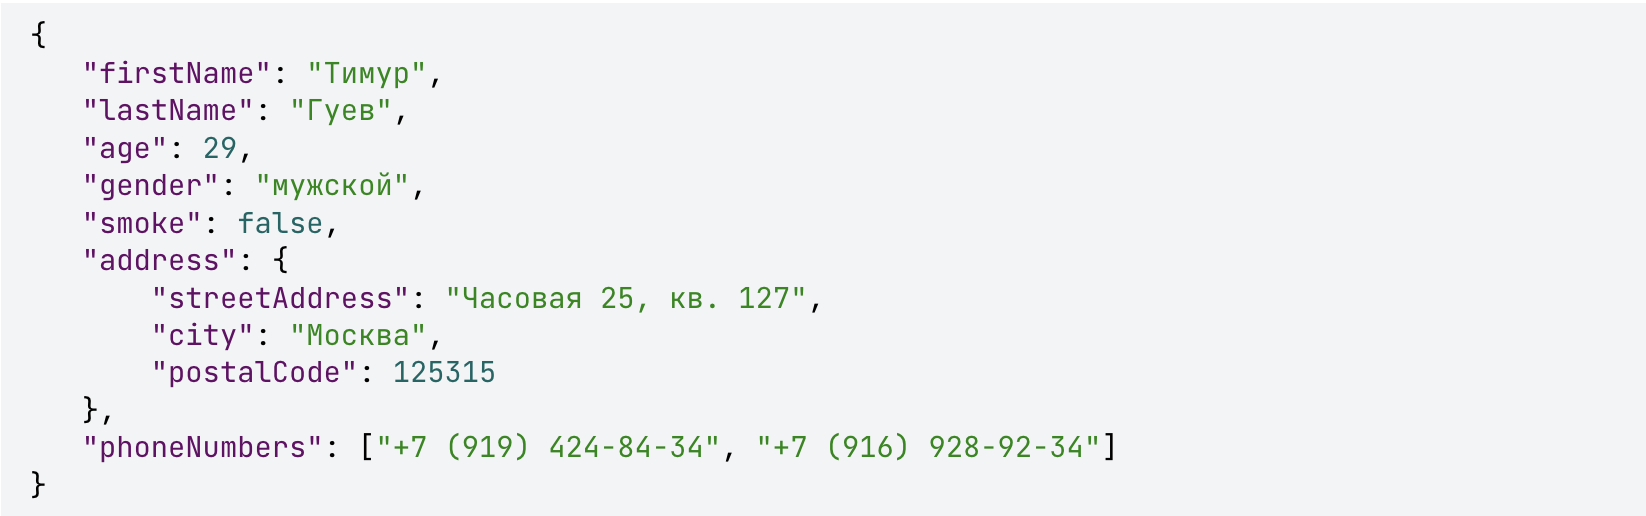

Данные в формате json имеют структуру **ключ-значение**.

Это напоминает словарь Python, но в отличие от словаря, **ключи в json могут быть только строками** , заключенными в двойные кавычки.

Значениями в json формате могут быть:
* **числа** (целое или вещественное)
* **литералы true, false, null** (отсутствие значения)
* **строки** (последовательность символов, заключенная в двойные кавычки)
* **списки** (заключается в квадратные скобки [ ], значения разделяются запятыми). Список может быть пустым, значения в пределах одного списка могут иметь разный тип
* **вложенные словари** (неупорядоченное множество пар ключ: значение, заключённое в фигурные скобки { }). Ключ описывается строкой, между ним и значением стоит символ :. Пары ключ-значение отделяются друг от друга запятыми


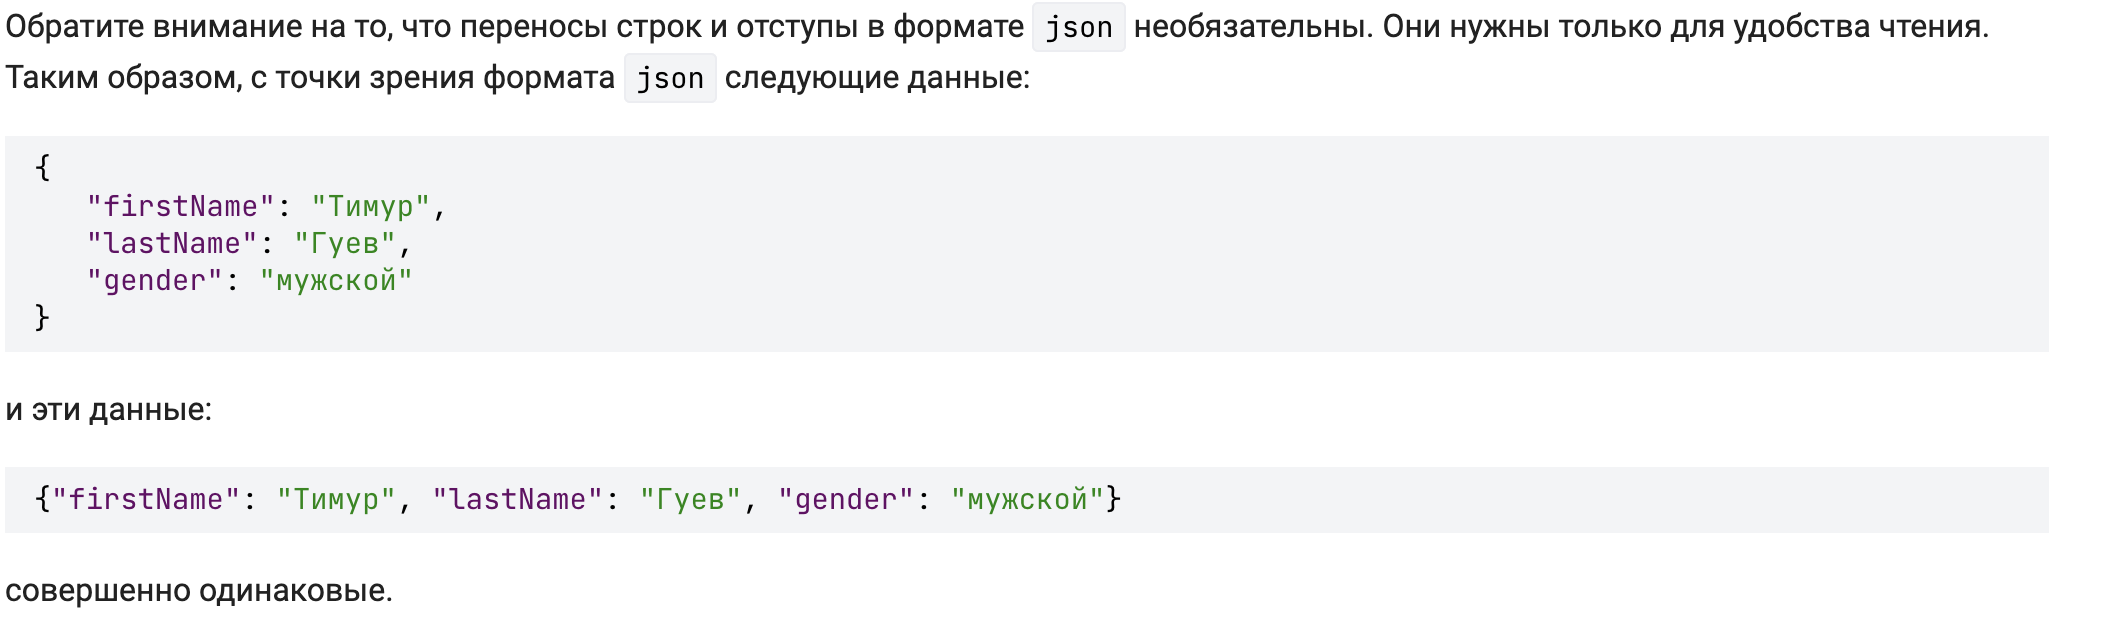

Мы можем сериализовать любой объект, поддерживаемый форматом json, например число, список, строку и т.д.

Поэтому тоже json строка:

 ["Hello", 179, true, null, [1, 2, 3], {"key": "value"}]

**МОДУЛЬ JSON**

В Python для сериализации и десериализации в формат json есть модуль, который так и называется — json.



**Сериализация**- преобразование переменных программы (Python-объектов) в формат для хранения

**Десериализация**- преобразование формата для хранения в Python-объекты.

**json.dumps(data)** - сериализует данные словаря data в json строку и возвращает ее

**json.dump(data, file)** - записывает словарь data в файл file


dump, dumps имеют необязательные параметры:
*  **indent** - аргумент задает отступ от левого края; по умолчанию none(без отступа).Если значением indent является строка, то она используется в качестве отступа.
*  **sort_keys** - параметр задает сортировку ключей в результирующем json.По умолчанию имеет значение False для более быстрого создания json. Если установить значение аргумента в True, то ключи будут отсортированы в алфавитном порядке
*  **separators**-  задает кортеж, состоящий из двух элементов (item_separator, key_separator), которые представляют разделители для элементов и ключей.  По умолчанию аргумент имеет значение (', ', ': ').


In [ ]:
import json

data = {'name': 'Russia', 'phone_code': 7, 'capital': 'Moscow', 'flag': True}

#преобразование словаря data в json строку
json_data = json.dumps(data)
print(type(json_data))
print(json_data)

#запись словаря data в файл myfile.json
with open('myfile.json', 'w') as file:
  json.dump(data, file)

<class 'str'>
{"name": "Russia", "phone_code": 7, "capital": "Moscow", "flag": true}


In [ ]:
import json

data = {'name': 'Russia', 'phone_code': 7, 'capital': 'Moscow', 'currency': 'RUB'}

json_data1 = json.dumps(data, indent=3)
json_data2 = json.dumps(data, indent='++++', separators=(';', ' = '))

print(json_data1)
print(json_data2)

**json.loads(json_data)** - десериализует json строку json_data в словарь или список и возвращает его

**json.load(file)** - десериализует содержимое json файла file в словарь или список и  возвращает его.


In [ ]:
import json

json_data = '{"name": "Russia", "phone_code": 7, "capital": "Moscow", "currency": "RUB"}'
data = json.loads(json_data)
print(type(data))
print(data)

<class 'dict'>
{'name': 'Russia', 'phone_code': 7, 'capital': 'Moscow', 'currency': 'RUB'}


In [ ]:
import json

with open('/content/gdrive/MyDrive/Colab Notebooks/religion.json') as file:
  religions = json.load(file)
  for religion, countries in religions.items():
    print(religion, ': ', end = '')
    print(*countries, sep = ', ')


Кодирование символов кирилицы и ensure_ascii


In [ ]:
import json

#При сериализации символов кириллицы может возникнуть ситуация, когда буквы переводятся в их коды
data = {'firstName': 'Тимур', 'lastName': 'Гуев'}
s = json.dumps(data)
print(s)

#Обратное преобразование из строки в словарь вернет закодированное значение в первоначальный вид.
#Благодаря стандартным кодам, символы будут прочитаны и преобразованы в нужный вид любой программой на любом языке программирования.
result = json.loads(s)
print(result)

#С помощью необязательного аргумента ensure_ascii функций dumps() и dump() можно отказаться от такого кодирования.
s = json.dumps(data, ensure_ascii=False)
print(s)
result = json.loads(s)
print(result)



{"firstName": "\u0422\u0438\u043c\u0443\u0440", "lastName": "\u0413\u0443\u0435\u0432"}
{'firstName': 'Тимур', 'lastName': 'Гуев'}
{"firstName": "Тимур", "lastName": "Гуев"}
{'firstName': 'Тимур', 'lastName': 'Гуев'}
